<a href="https://colab.research.google.com/github/srilalithaveerubhotla/CNN-BASICS/blob/master/resnet_keras_cifar100_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN basics : RESNET from scratch in keras on cifar 100 ran on GPU with all statistics locked in the notebook

Tensorboard: https://tensorboard.dev/experiment/7V5nvr7nQPG1LDs6DgG0gw/#scalars

## Importing Libraries

In [1]:
# Libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

from tensorflow.keras.datasets import mnist

import keras
from keras import models
from keras.datasets import cifar100
import keras.layers as layers
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation, AveragePooling2D
from keras.models import Sequential
from keras.utils import plot_model
from keras.preprocessing import image
from keras.initializers import Identity
import tensorflow as tf
import datetime
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard


Using TensorFlow backend.


In [2]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()


169009152/169001437 [==============================] - 11s 0us/step


[41]


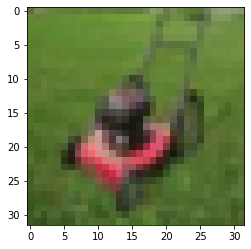

In [0]:
print(y_train[500])
pyplot.imshow(x_train[500])

In [0]:
y_train.shape

(50000, 1)

In [0]:
np.random.seed(1)

img, labels = (x_train[0:1000].reshape(1000, 32, 32, 3), y_train[0:1000])



# creating an array of zeros 
one_hot_labels = np.zeros((len(labels), 100))

# assigning 1 to where the label would be for that particular array
# for example, if the array 
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels


test_label = np.zeros((len(y_test), 100))
for i,l in enumerate(y_test):
    test_label[i][l] = 1



## Resnet Architecture

In [0]:
def create_model():

  model = Sequential()
  model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same"))
  model.add(BatchNormalization())
  model.add(Activation('relu'))



  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

  model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())

  model.add(Dense(units=100, activation="softmax"))

  return model

In [5]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 128)        

In [0]:
# creating an array of zeros 
one_hot_labels = np.zeros((len(y_train), 100))


# assigning 1 to where the label would be for that particular array
# for example, if the array 

for i,l in enumerate(y_train):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

In [7]:
# create tensorboard
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
              

log_dir="logs/resnet-keras" 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# fitting model to 1000 samples from cifar100
model.fit(x=x_train, 
          y=labels, 
          epochs=10, 
          validation_data=(x_test, test_label), 
          callbacks=[tensorboard_callback])



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 486us/step - loss: 0.0419 - accuracy: 0.9904 - val_loss: 0.0372 - val_accuracy: 0.9907
Epoch 2/10
50000/50000 [==============================] - 17s 350us/step - loss: 0.0310 - accuracy: 0.9916 - val_loss: 0.0339 - val_accuracy: 0.9911
Epoch 3/10
50000/50000 [==============================] - 18s 350us/step - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0339 - val_accuracy: 0.9913
Epoch 4/10
50000/50000 [==============================] - 17s 349us/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.0372 - val_accuracy: 0.9907
Epoch 5/10
50000/50000 [==============================] - 18s 353us/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0414 - val_accuracy: 0.9902
Epoch 6/10
50000/50000 [==============================] - 18s 351us/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0506 - val_accuracy: 0.9892
Epoch 7/10
50000/50000 [==============================] 

In [9]:
!tensorboard dev upload --logdir logs/resnet-keras/ \
  --name "SRILALITHA's CIFAR Classification using Resnet with Keras"

2020-05-20 02:44:23.868893: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Data for the "graphs" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.
View your TensorBoard live at: https://tensorboard.dev/experiment/8I4gAfYgRqew12aDbwli8Q/

Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/8I4gAfYgRqew12aDbwli8Q/
^C


## Visualization

In [0]:
from keras.preprocessing import image

img_tensor = image.img_to_array(x_train[500])
img_tensor = np.expand_dims(img_tensor, axis=0)

# img = np.pad(img, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

print(img_tensor.shape)


(1, 32, 32, 3)


In [0]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [0]:
first_layer_activation = activations[0]

# printing the first layer of the mnist dataset
# it's a 30x30 feature map with 6 channels
print(first_layer_activation.shape)

(1, 32, 32, 64)


[41]


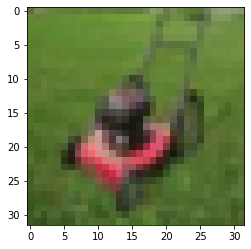

In [0]:
print(y_train[500])
pyplot.imshow(x_train[500])

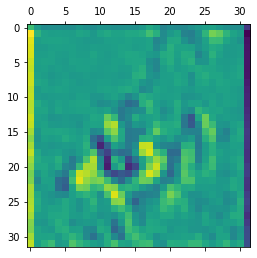

In [0]:
import matplotlib.pyplot as plt

# viewing the 3rd channel 
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

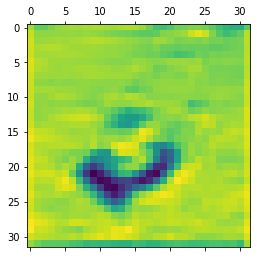

In [0]:
# viewing the 5th channel
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()